In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
#import catboost


In [2]:
from pycaret.datasets import get_data
index= get_data('index')


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [3]:
juice = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


# **Initialize Setup**

In [4]:
from pycaret.classification import *
clf1 = setup(data=juice, target='Purchase', session_id=123, log_experiment=False, experiment_name='juice_classification')

,Description,Value
0,Session id,123
1,Target,Purchase
2,Target type,Binary
3,Target mapping,"CH: 0, MM: 1"
4,Original data shape,"(1070, 19)"
5,Transformed data shape,"(1070, 19)"
6,Transformed train set shape,"(749, 19)"
7,Transformed test set shape,"(321, 19)"
8,Numeric features,17
9,Categorical features,1


# ***Compare Baseline***

In [5]:
best_model= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8278,0.8941,0.8278,0.8299,0.8268,0.6354,0.6388,0.0100
lr,Logistic Regression,0.8184,0.8927,0.8184,0.8202,0.8162,0.6120,0.6168,0.5390
ridge,Ridge Classifier,0.8158,0.8938,0.8158,0.8183,0.8146,0.6099,0.6138,0.0100
gbc,Gradient Boosting Classifier,0.8037,0.8888,0.8037,0.8086,0.8031,0.5877,0.5926,0.0330
catboost,CatBoost Classifier,0.7944,0.8889,0.7944,0.7960,0.7931,0.5643,0.5676,0.5250
lightgbm,Light Gradient Boosting Machine,0.7930,0.8729,0.7930,0.7946,0.7925,0.5636,0.5658,0.0950
ada,Ada Boost Classifier,0.7917,0.8640,0.7917,0.7917,0.7899,0.5565,0.5592,0.0240
rf,Random Forest Classifier,0.7797,0.8724,0.7797,0.7819,0.7789,0.5355,0.5384,0.0480
et,Extra Trees Classifier,0.7678,0.8479,0.7678,0.7685,0.7669,0.5097,0.5114,0.0420
dt,Decision Tree Classifier,0.7650,0.7582,0.7650,0.7696,0.7657,0.5107,0.5131,0.0110


# **Create Model**

In [6]:
lr= create_model('lr')  # Logistic Regression

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8531,0.8000,0.8115,0.8022,0.5914,0.5969
1,0.8400,0.9183,0.8400,0.8434,0.8357,0.6493,0.6595
2,0.8267,0.8876,0.8267,0.8280,0.8272,0.6369,0.6371
3,0.7333,0.8351,0.7333,0.7305,0.7227,0.4076,0.4195
4,0.7600,0.8508,0.7600,0.7600,0.7600,0.4940,0.4940
5,0.8267,0.8981,0.8267,0.8255,0.8247,0.6274,0.6298
6,0.8667,0.9408,0.8667,0.8667,0.8667,0.7189,0.7189
7,0.8267,0.9193,0.8267,0.8324,0.8215,0.6243,0.6375
8,0.8800,0.9363,0.8800,0.8806,0.8788,0.7458,0.7485


In [7]:
dt= create_model('dt')  # Decision Tree

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7733,0.7897,0.7733,0.8014,0.7763,0.5480,0.5644
1,0.7733,0.7706,0.7733,0.7793,0.7751,0.5311,0.5329
2,0.7333,0.7253,0.7333,0.7373,0.7348,0.4449,0.4455
3,0.7067,0.6908,0.7067,0.7067,0.7067,0.3816,0.3816
4,0.7467,0.7425,0.7467,0.7530,0.7486,0.4759,0.4775
5,0.7600,0.7534,0.7600,0.7638,0.7613,0.5004,0.5011
6,0.8267,0.8205,0.8267,0.8280,0.8272,0.6369,0.6371
7,0.7200,0.7000,0.7200,0.7167,0.7171,0.4068,0.4082
8,0.8267,0.8222,0.8267,0.8279,0.8271,0.6409,0.6411


In [8]:
gb= create_model('gbc')  # Gradient Boosting Classifier

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7600,0.8403,0.7600,0.7689,0.7623,0.5066,0.5097
1,0.8267,0.9145,0.8267,0.8315,0.8209,0.6175,0.6310
2,0.8000,0.8819,0.8000,0.8115,0.8022,0.5914,0.5969
3,0.7200,0.8193,0.7200,0.7159,0.7168,0.3982,0.3996
4,0.7467,0.8801,0.7467,0.7588,0.7494,0.4824,0.4869
5,0.8267,0.9063,0.8267,0.8258,0.8261,0.6322,0.6325
6,0.8533,0.9449,0.8533,0.8719,0.8552,0.7040,0.7168
7,0.8667,0.8789,0.8667,0.8663,0.8658,0.7191,0.7202
8,0.8267,0.9393,0.8267,0.8259,0.8249,0.6328,0.6351


In [9]:
lda= create_model('lda')  # Linear Discriminant Analysis

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.8516,0.8133,0.8215,0.8151,0.6162,0.6200
1,0.8267,0.9123,0.8267,0.8273,0.8230,0.6225,0.6292
2,0.8533,0.8898,0.8533,0.8584,0.8545,0.6966,0.6990
3,0.7467,0.8343,0.7467,0.7429,0.7412,0.4483,0.4531
4,0.7600,0.8651,0.7600,0.7638,0.7613,0.5004,0.5011
5,0.8267,0.8988,0.8267,0.8258,0.8261,0.6322,0.6325
6,0.8800,0.9483,0.8800,0.8847,0.8809,0.7517,0.7543
7,0.8400,0.9200,0.8400,0.8441,0.8361,0.6552,0.6651
8,0.8800,0.9363,0.8800,0.8796,0.8796,0.7486,0.7489


# **Tune Hyperparameters**

In [10]:
#Tuning hyperparameters for Logistic Regression
tuned_lr= tune_model(lr)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:32:01
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7733,0.8561,0.7733,0.8014,0.7763,0.5480,0.5644
1,0.8533,0.9175,0.8533,0.8545,0.8538,0.6927,0.6930
2,0.8000,0.8876,0.8000,0.8189,0.8025,0.5963,0.6072
3,0.8133,0.8321,0.8133,0.8166,0.8144,0.6114,0.6123
4,0.7733,0.8441,0.7733,0.8121,0.7760,0.5534,0.5781
5,0.8133,0.8973,0.8133,0.8133,0.8133,0.6064,0.6064
6,0.8800,0.9385,0.8800,0.8847,0.8809,0.7517,0.7543
7,0.8800,0.9185,0.8800,0.8806,0.8788,0.7458,0.7485
8,0.8533,0.9348,0.8533,0.8580,0.8543,0.6995,0.7018


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [11]:
tuned_lda= tune_model(lda)  # Random Forest

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8553,0.8000,0.8057,0.8015,0.5862,0.5883
1,0.8267,0.9183,0.8267,0.8273,0.8230,0.6225,0.6292
2,0.8000,0.8966,0.8000,0.8115,0.8022,0.5914,0.5969
3,0.7733,0.8418,0.7733,0.7707,0.7707,0.5128,0.5147
4,0.7467,0.8516,0.7467,0.7484,0.7474,0.4693,0.4695
5,0.8400,0.8973,0.8400,0.8400,0.8374,0.6538,0.6582
6,0.8667,0.9408,0.8667,0.8694,0.8674,0.7224,0.7235
7,0.8667,0.9259,0.8667,0.8681,0.8647,0.7159,0.7206
8,0.8800,0.9348,0.8800,0.8806,0.8788,0.7458,0.7485


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Ensemble Model**

In [12]:
bagged_lr= ensemble_model(tuned_lr, method='Bagging')

In [13]:
boosted_lr= ensemble_model(tuned_lr, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7534,0.6667,0.7033,0.6706,0.3433,0.3586
1,0.7333,0.8201,0.7333,0.7426,0.7359,0.4518,0.4545
2,0.6533,0.7106,0.6533,0.6945,0.6570,0.3210,0.3381
3,0.5733,0.7001,0.5733,0.5973,0.5789,0.1441,0.1475
4,0.6533,0.7024,0.6533,0.6771,0.6578,0.3046,0.3118
5,0.6800,0.6942,0.6800,0.6800,0.6800,0.3253,0.3253
6,0.7200,0.7504,0.7200,0.7325,0.7231,0.4279,0.4319
7,0.7200,0.7563,0.7200,0.7260,0.7218,0.4262,0.4277
8,0.6267,0.7444,0.6267,0.6484,0.6304,0.2553,0.2613


# **Blend Models**

In [14]:
blended_lr= blend_models(estimator_list=[tuned_lr, tuned_lda, bagged_lr, boosted_lr], method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7733,0.8628,0.7733,0.7925,0.7762,0.5425,0.5524
1,0.8267,0.9175,0.8267,0.8255,0.8247,0.6274,0.6298
2,0.8133,0.8876,0.8133,0.8282,0.8156,0.6209,0.6293
3,0.7867,0.8261,0.7867,0.7848,0.7851,0.5444,0.5453
4,0.7600,0.8583,0.7600,0.7754,0.7629,0.5126,0.5195
5,0.8267,0.9003,0.8267,0.8258,0.8261,0.6322,0.6325
6,0.8800,0.9438,0.8800,0.8847,0.8809,0.7517,0.7543
7,0.8667,0.9200,0.8667,0.8681,0.8647,0.7159,0.7206
8,0.8933,0.9356,0.8933,0.8933,0.8927,0.7753,0.7765


# **Stack Models**

In [15]:
stacked_lr= stack_models(estimator_list=[tuned_lr, tuned_lda, bagged_lr, boosted_lr], meta_model=tuned_lr)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:32:17
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7867,0.8636,0.7867,0.8200,0.7893,0.5772,0.5984
1,0.8267,0.9183,0.8267,0.8255,0.8247,0.6274,0.6298
2,0.8133,0.8868,0.8133,0.8282,0.8156,0.6209,0.6293
3,0.8000,0.8298,0.8000,0.7989,0.7993,0.5756,0.5759
4,0.7467,0.8591,0.7467,0.7747,0.7499,0.4949,0.5097
5,0.8267,0.8988,0.8267,0.8280,0.8272,0.6369,0.6371
6,0.8800,0.9438,0.8800,0.8847,0.8809,0.7517,0.7543
7,0.8667,0.9215,0.8667,0.8681,0.8647,0.7159,0.7206
8,0.8667,0.9348,0.8667,0.8667,0.8667,0.7222,0.7222


# **Analyze Model**

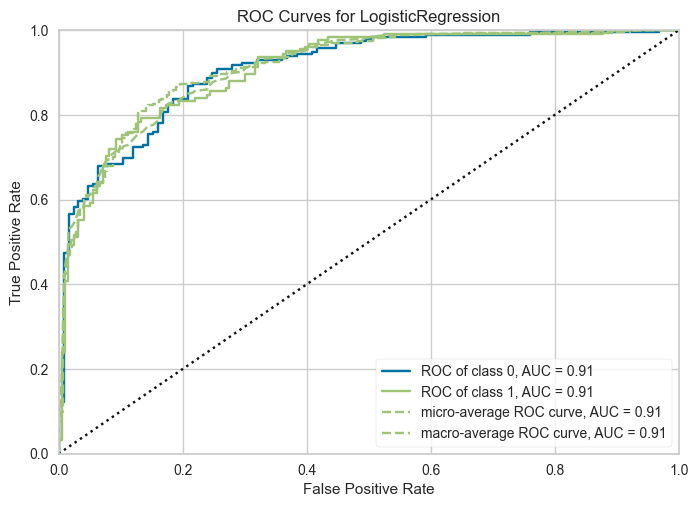

In [16]:
plot_model(lr)

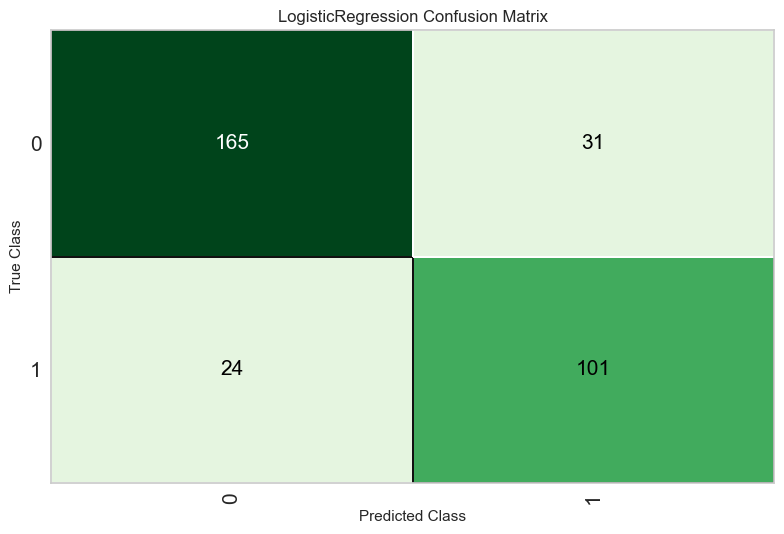

In [17]:
plot_model(tuned_lr, plot='confusion_matrix')

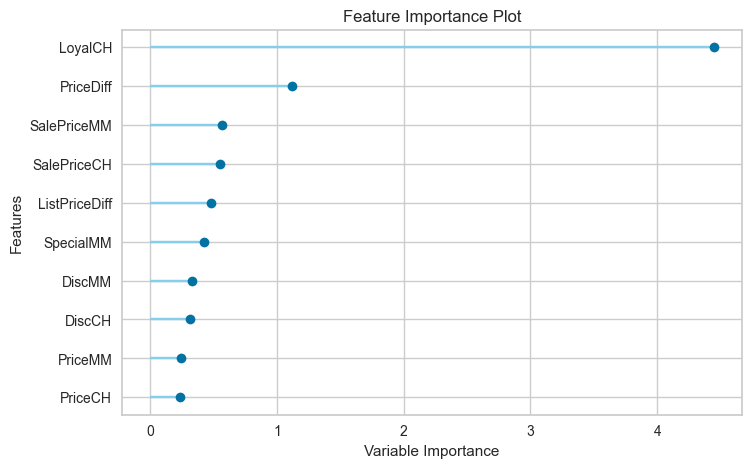

In [18]:
plot_model(tuned_lr,plot='feature')

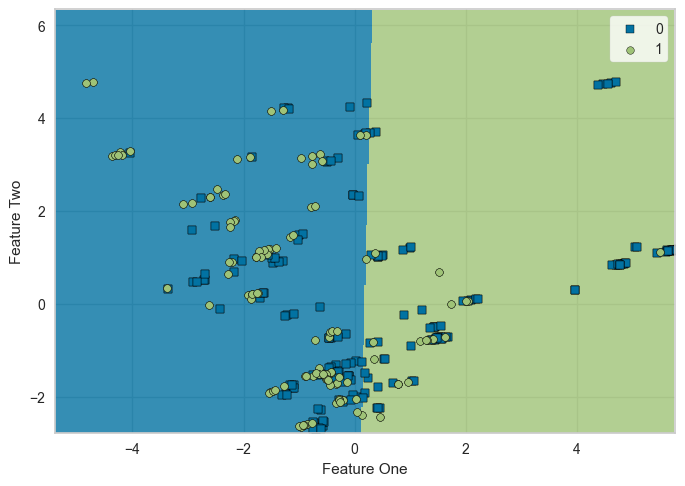

In [19]:
plot_model(tuned_lr,plot='boundary')

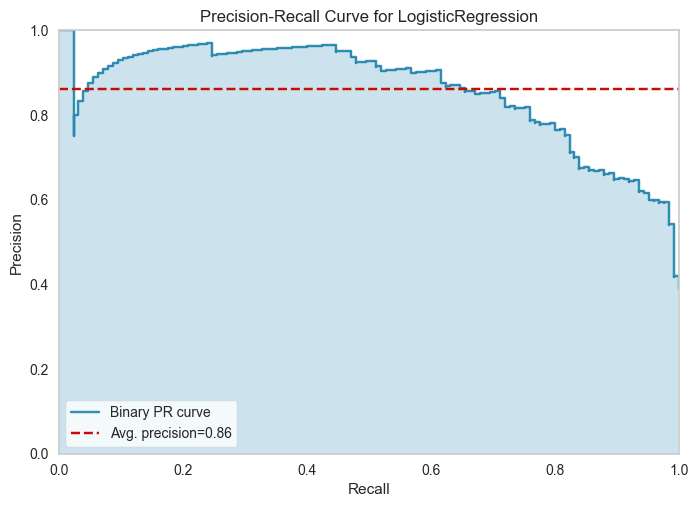

In [20]:
plot_model(tuned_lr,plot='pr')

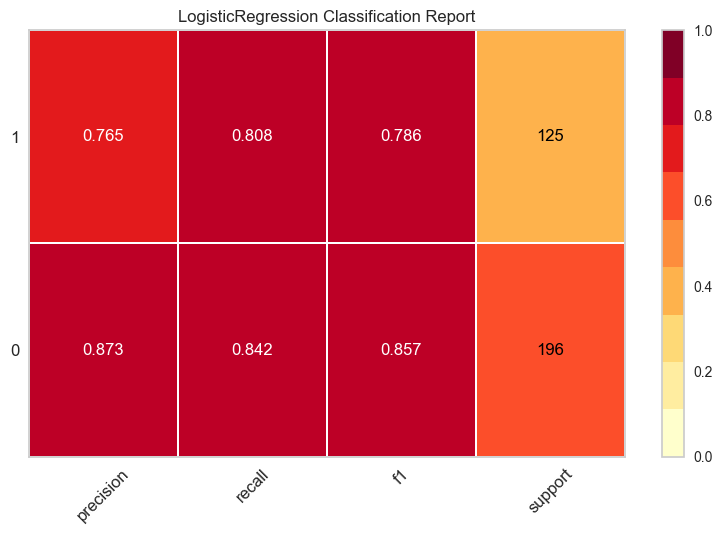

In [21]:
plot_model(tuned_lr,plot='class_report')

In [22]:
tuned_lr = tune_model(lr)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7733,0.8561,0.7733,0.8014,0.7763,0.5480,0.5644
1,0.8533,0.9175,0.8533,0.8545,0.8538,0.6927,0.6930
2,0.8000,0.8876,0.8000,0.8189,0.8025,0.5963,0.6072
3,0.8133,0.8321,0.8133,0.8166,0.8144,0.6114,0.6123
4,0.7733,0.8441,0.7733,0.8121,0.7760,0.5534,0.5781
5,0.8133,0.8973,0.8133,0.8133,0.8133,0.6064,0.6064
6,0.8800,0.9385,0.8800,0.8847,0.8809,0.7517,0.7543
7,0.8800,0.9185,0.8800,0.8806,0.8788,0.7458,0.7485
8,0.8533,0.9348,0.8533,0.8580,0.8543,0.6995,0.7018


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [23]:
%matplotlib inline

In [24]:
evaluate_model(tuned_lr)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

ModuleNotFoundError: 
'shap' is a soft dependency and not included in the pycaret installation. Please run: `pip install shap` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`